In [1]:
import pandas as pd #for tasks related to data : import, export, manipulation
import numpy as np #for numerical tasks

import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #multidimensional plot

In [2]:
df = pd.read_csv("/Users/sonavaneonkar/Downloads/Project 1/Data/hotel_bookings.csv") #import the data in the project
df.tail() 

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out                9/6/2017  
119386           Check-Out                9/7/2017  
119387           Check-Out                9/7/2017  
119388           Check-Out                9/7/2017  
119389           Check-Out                9/7/2017  

[5 rows x 32 columns]

# Cleaning Data

In [3]:
df.shape

(119390, 32)

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Replacing missing values with 0 (zero imputation)

In [5]:
#not available data
def data_clean(df):
    df.fillna(0,inplace = True) #zero imputation
    print(df.isnull().sum())
    

In [6]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
list_cols = ["children", "adults", "babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


## Deleting rows where "children", "adults", "babies" these values are 0 - '180' values removed

In [8]:
#clean the data 

filtered_data = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0) #none came  dirty data

final_data = df[~filtered_data] #filter it out

In [9]:
final_data.shape

(119210, 32)

In [10]:
df.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [11]:

# Read the dataset from CSV file
hotel_data = pd.read_csv('/Users/sonavaneonkar/Downloads/Project 1/Data/hotel_bookings.csv')

# Filter the dataset based on the count of adults, children, and babies
no_guests = (hotel_data['adults'] == 0) & (hotel_data['children'] == 0) & (hotel_data['babies'] == 0)
zero_guests_data = hotel_data[no_guests]

# Print the filtered data
print(zero_guests_data)


               hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November     

# Where do guest come from? (spatial Analysis)

In [12]:
country_wise_data =  final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()


country_wise_data.columns = ["Country", "No.of guests"]
print(country_wise_data)


    Country  No.of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]


In [13]:
import plotly.express as px

In [14]:
map_guests = px.choropleth(country_wise_data, 
                           locations = country_wise_data['Country'],
                           color = country_wise_data["No.of guests"],
                           hover_name = country_wise_data['Country'],
                           title = "Home country of guests"
                          )

map_guests.show()

# How much do guests pay for a room per night?

## Getting unique hotel names

In [15]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
final_data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [17]:
data = final_data[final_data["is_canceled"] == 0]

In [18]:
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

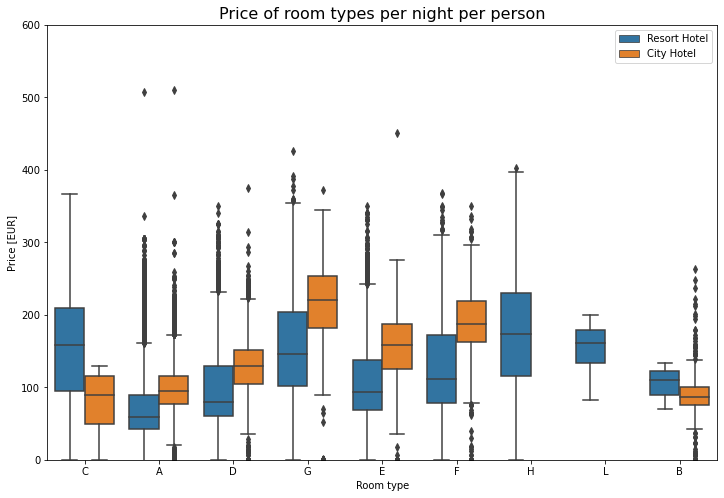

In [31]:
#boxplot
plt.figure(figsize = (12,8)) #default

sns.boxplot(x = "reserved_room_type",
           y = "adr", 
           hue = "hotel", 
           data = data)

plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.show()



# How does the price per night (adr) vary over the year?

In [20]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [21]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]


data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

## How many people came to resort hotel per month


In [22]:
#resort hotel: variable: data_resort

#adr attribute : 

#how many people came to resort hotel per month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [23]:
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [24]:
#how many people came to city hotel per month
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [25]:
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

## Merging two dataframes into one on basis of arrival date month 

In [26]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")

final.columns = ["month", "price_for_resort_hotel", "price_for_city_hotel"]

In [28]:
final

month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582

# Sorting the months

In [29]:
from calendar import month_name

def sort_month(df, colname):
    month_dict = { j:i for i, j in enumerate(month_name) } #dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)

In [33]:
final = sort_month(final, "month")

In [34]:
final.plot(kind = "line", x = "month", y = ['price_for_resort_hotel','price_for_city_hotel'])

<AxesSubplot:xlabel='month'>

# Which are the most busy month or in which months Guests are high?

In [36]:
data_resort

hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
40055  Resort Hotel            0        212               2017   
40056  Resort Hotel            0        169               2017   
40057  Resort Hotel            0        204               2017   
40058  Resort Hotel            0        211               2017   
40059  Resort Hotel            0        161               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                        27                          1   
2                   July                        27                          1   
3                   July                        27                          1   
4                   July                        27                          1   
...                  ...                       ...                        ...   
40055             August                        35                         31   
40056             August                        35                         30   
40057             August                        35                         29   
40058             August                        35                         31   
40059             August                        35                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                            0                     0       2  ...   
1                            0                     0       2  ...   
2                            0                     1       1  ...   
3                            0                     1       1  ...   
4                            0                     2       2  ...   
...                        ...                   ...     ...  ...   
40055                        2                     8       2  ...   
40056                        2                     9       2  ...   
40057                        4                    10       2  ...   
40058                        4                    10       2  ...   
40059                        4                    10       2  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
0        No Deposit    0.0     0.0                    0        Transient   
1        No Deposit    0.0     0.0                    0        Transient   
2        No Deposit    0.0     0.0                    0        Transient   
3        No Deposit  304.0     0.0                    0        Transient   
4        No Deposit  240.0     0.0                    0        Transient   
...             ...    ...     ...                  ...              ...   
40055    No Deposit  143.0     0.0                    0        Transient   
40056    No Deposit  250.0     0.0                    0  Transient-Party   
40057    No Deposit  250.0     0.0                    0        Transient   
40058    No Deposit   40.0     0.0                    0         Contract   
40059    No Deposit   69.0     0.0                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
0        0.00                            0                          0   
1        0.00                            0                          0   
2       75.00                            0                          0   
3       75.00                            0                          0   
4       98.00                            0                          1   
...       ...                          ...                        ..

In [37]:
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ["month", "no of guests"]

print(rush_resort)

        month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [39]:
rush_resort = sort_month(rush_resort, "month")
rush_resort

month  no of guests
0     January          1866
1    February          2308
2       March          2571
3       April          2550
4         May          2535
5        June          2037
6        July          3137
7      August          3257
8   September          2102
9     October          2575
10   November          1975
11   December          2014

In [40]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month", "no of guests"]

print(rush_city)

        month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [41]:
rush_city = sort_month(rush_city, "month")
rush_city

month  no of guests
0     January          2249
1    February          3051
2       March          4049
3       April          4010
4         May          4568
5        June          4358
6        July          4770
7      August          5367
8   September          4283
9     October          4326
10   November          2676
11   December          2377

# Merge two data frames rush_resort and rush_city for visualization

In [43]:
final_rush = rush_resort.merge(rush_city, on = "month")
final_rush.columns = ["month", "no of guests in resort hotel", "no of guests in city hotel"]

In [44]:
final_rush

month  no of guests in resort hotel  no of guests in city hotel
0     January                          1866                        2249
1    February                          2308                        3051
2       March                          2571                        4049
3       April                          2550                        4010
4         May                          2535                        4568
5        June                          2037                        4358
6        July                          3137                        4770
7      August                          3257                        5367
8   September                          2102                        4283
9     October                          2575                        4326
10   November                          1975                        2676
11   December                          2014                        2377

## Line Plot

In [45]:
final_rush.plot(kind = "line", x = "month", y = ['no of guests in resort hotel','no of guests in city hotel'])

<AxesSubplot:xlabel='month'>

# How long do people stay at the hotels?

In [46]:
filter_condition = final_data['is_canceled'] == 0

clean_data = final_data[filter_condition]


In [48]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [49]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

/var/folders/bw/fdws4hb55350qkgfkhtzp_gh0000gn/T/ipykernel_2054/2600119523.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    0.0      0.0   
1                        0                     0       2  ...    0.0      0.0   
2                        0                     1       1  ...    0.0      0.0   
3                        0                     1       1  ...  304.0      0.0   
4                        0                     2       2  ...  240.0      0.0   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out                 7/1/2015   
1                          0           Check-Out                 7/1/2015   
2                          0           Check-Out                 7/2/2015   
3                          0           Check-Out                 7/2/2015   
4                          1           Check-Out                 7/3/2015   

  total_nights  
0            0  
1            0  
2            1  
3            1  
4            2  

[5 rows x 33 columns]

In [52]:
stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()

stay = stay.iloc[:, 0:3]
stay

total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]

In [53]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})

In [54]:
stay

total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

## Bar Plot

In [55]:
#plot the barplot

sns.barplot(x = "total_nights", 
            y = "Number of stays", 
            hue = "hotel",
           hue_order = ["City Hotel", "Resort Hotel"], 
            data = stay)



<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

# Selecting Important Numerical Features using Co-relation

In [56]:
correlation = final_data.corr()

In [57]:
correlation = correlation["is_canceled"][1:]

In [58]:
correlation.abs().sort_values(ascending = False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [59]:
list_not = ["days_in_waiting_list", "arrival_date_year"]

In [60]:
num_features = [col for col in final_data.columns if final_data[col].dtype != "O" and col not in list_not]  #numerical one

### Important Numerical features

In [61]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

# Select important Categorical Features

In [62]:
final_data["reservation_status"].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [63]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [64]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list" ]

In [65]:
cat_features = [col for col in final_data.columns 
                if final_data[col].dtype == "O" and col not in cat_not]

### Important categorical Features 

In [66]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [67]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [68]:
data_cat = final_data[cat_features]

In [69]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015

In [70]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])


In [71]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [72]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  year  \
0                  C   No Deposit     Transient              2015-07-01  2015   
1                  C   No Deposit     Transient              2015-07-01  2015   
2                  A   No Deposit     Transient              2015-07-02  2015   
3                  A   No Deposit     Transient              2015-07-02  2015   
4                  A   No Deposit     Transient              2015-07-03  2015   

   month  day  
0      7    1  
1      7    1  
2      7    2  
3      7    2  
4      7    3

In [73]:
data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [74]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type  year  month  day  
0                  C   No Deposit     Transient  2015      7    1  
1                  C   No Deposit     Transient  2015      7    1  
2                  A   No Deposit     Transient  2015      7    2  
3                  A   No Deposit     Transient  2015      7    2  
4                  A   No Deposit     Transient  2015      7    3

# Feature Encoding

## Mean encoding Technique

In [75]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [76]:
data_cat["cancellation"] = final_data["is_canceled"]

In [77]:
data_cat

hotel arrival_date_month meal market_segment  \
0       Resort Hotel               July   BB         Direct   
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
0                    Direct                  C   No Deposit     Transient   
1                    Direct                  C   No Deposit     Transient   
2                    Direct                  A   No Deposit     Transient   
3                 Corporate                  A   No Deposit     Transient   
4                     TA/TO                  A   No Deposit     Transient   
...                     ...                ...          ...           ...   
119385                TA/TO                  A   No Deposit     Transient   
119386                TA/TO                  E   No Deposit     Transient   
119387                TA/TO                  D   No Deposit     Transient   
119388                TA/TO                  A   No Deposit     Transient   
119389                TA/TO                  A   No Deposit     Transient   

        year  month  day  cancellation  
0       2015      7    1             0  
1       2015      7    1             0  
2       2015      7    2             0  
3       2015      7    2             0  
4       2015      7    3             0  
...      ...    ...  ...           ...  
119385  2017      9    6             0  
119386  2017      9    7             0  
119387  2017      9    7             0  
119388  2017      9    7             0  
119389  2017      9    7             0  

[119210 rows x 12 columns]

In [78]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")



In [79]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [80]:
data_cat

hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330827       0.28402       0.407864   
2                   0.174868            0.391567       0.28402       0.407864   
3                   0.220568            0.391567       0.28402       0.407864   
4                   0.410598            0.391567       0.28402       0.407864   
...                      ...                 ...           ...            ...   
119385              0.410598            0.391567       0.28402       0.407864   
119386              0.410598            0.292683       0.28402       0.407864   
119387              0.410598            0.318108       0.28402       0.407864   
119388              0.410598            0.391567       0.28402       0.407864   
119389              0.410598            0.391567       0.28402       0.407864   

        year  month  day  
0       2015      7    1  
1       2015      7    1  
2       2015      7    2  
3       2015      7    2  
4       2015      7    3  
...      ...    ...  ...  
119385  2017      9    6  
119386  2017      9    7  
119387  2017      9    7  
119388  2017      9    7  
119389  2017      9    7  

[119210 rows x 11 columns]

# Preparing Data

In [81]:
num_data = final_data[num_features] #numerical data

cat_data = data_cat #categorical data


dataframe = pd.concat([num_data, cat_data], axis = 1) #final dataframe


In [82]:
dataframe

is_canceled  lead_time  arrival_date_week_number  \
0                 0        342                        27   
1                 0        737                        27   
2                 0          7                        27   
3                 0         13                        27   
4                 0         14                        27   
...             ...        ...                       ...   
119385            0         23                        35   
119386            0        102                        35   
119387            0         34                        35   
119388            0        109                        35   
119389            0        205                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                          0       2       0.0       0                  0   
1                          0       2       0.0       0                  0   
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     5       2       0.0       0                  0   
119386                     5       3       0.0       0                  0   
119387                     5       2       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     7       2       0.0       0                  0   

        ...  arrival_date_month      meal  market_segment  \
0       ...            0.374644  0.374106        0.153712   
1       ...            0.374644  0.374106        0.153712   
2       ...            0.374644  0.374106        0.153712   
3       ...            0.374644  0.374106        0.187618   
4       ...            0.374644  0.374106        0.367590   
...     ...                 ...       ...             ...   
119385  ...            0.377823  0.374106        0.343313   
119386  ...            0.377823  0.374106        0.367590   
119387  ...            0.377823  0.374106        0.367590   
119388  ...            0.377823  0.374106        0.367590   
119389  ...            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330827       0.28402       0.407864   
2                   0.174868            0.391567       0.28402       0.407864   
3                   0.220568            0.391567       0.28402       0.407864   
4                   0.410598            0.391567       0.28402       0.407864   
...                      ...                 ...           ...            ...   
119385              0.410598            0.391567       0.28402       0.407864   
119386              0.410598            0.292683       0.28402       0.407864   
119387              0.410598            0.318108       0.28402       0.407864   
119388              0.410598            0.391567       0.28402       0.407

# handle Outliers

In [83]:
dataframe.describe()["adr"]

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

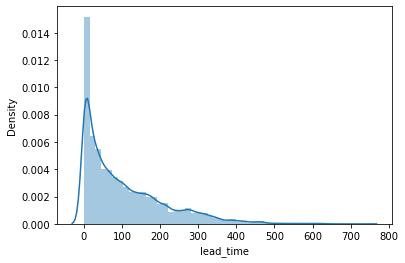

In [84]:
#using seaborn library
sns.distplot(dataframe["lead_time"])

In [85]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [86]:
handle_outlier("lead_time")

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

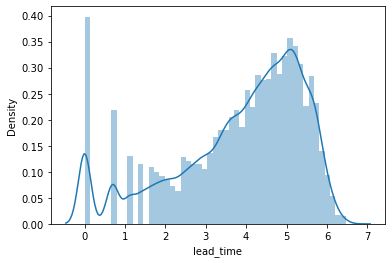

In [87]:
sns.distplot(dataframe["lead_time"].dropna())

<AxesSubplot:xlabel='adr', ylabel='Density'>

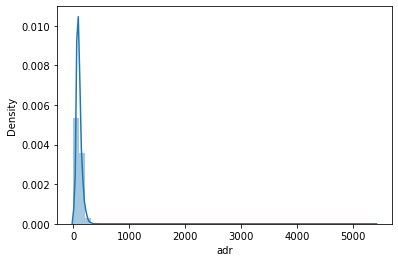

In [88]:
sns.distplot(dataframe["adr"])

In [89]:
handle_outlier("adr")

In [90]:
dataframe.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                       

In [91]:
dataframe.dropna(inplace = True)

# Feature Importance

In [92]:
##separate dependent and independent variables

y = dataframe["is_canceled"] #dependent variable

X = dataframe.drop("is_canceled", axis = 1) #independent



In [93]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [94]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [95]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [96]:
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [97]:
feature_sel_model.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True])

In [98]:
cols = X.columns
print(cols)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')


In [99]:
selected_feature = cols[(feature_sel_model.get_support())]

In [100]:
print(selected_feature)

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')


In [101]:
print(f"Total features {X.shape[1]}")

Total features 28


In [102]:
print(f"Selected features {len(selected_feature)}")

Selected features 14


In [103]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [104]:
X = X[selected_feature]

In [105]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [106]:
X.head()

lead_time  arrival_date_week_number  adults  children  \
0   5.837730                        27       2       0.0   
1   6.603944                        27       2       0.0   
2   2.079442                        27       1       0.0   
3   2.639057                        27       1       0.0   
4   2.708050                        27       2       0.0   

   previous_cancellations  booking_changes  company       adr  \
0                       0                3      0.0  0.000000   
1                       0                4      0.0  0.000000   
2                       0                0      0.0  4.330733   
3                       0                0      0.0  4.330733   
4                       0                0      0.0  4.595120   

   required_car_parking_spaces  total_of_special_requests  deposit_type  year  \
0                            0                          0       0.28402  2015   
1                            0                          0       0.28402  2015   
2                            0                          0       0.28402  2015   
3                            0                          0       0.28402  2015   
4                            0                          1       0.28402  2015   

   month  day  
0      7    1  
1      7    1  
2      7    2  
3      7    2  
4      7    3

In [107]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

# Splitting the Data and Model Building

In [108]:
# X -> independent variables

# y -> dependent variable


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 45)

# Implement Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #training of the model

LogisticRegression()

In [111]:
y_pred = logistic_model.predict(x_test) #prediction by model

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(y_test, y_pred)

array([[15396,  3286],
       [ 5301,  5820]])

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_test, y_pred)

0.7118746434922659

# we are implementing different classification algorithms

### logistic regression
### Naive Bayes
### Random Forest
### Decision Tree
### KNN

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [117]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [118]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    #make a predictions
    predictions = model.predict(x_test)
    
    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    
    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))
    
    print("\n")
    
    
    

Naive Bayes
[[8820 1289]
 [9862 9832]]
0.6258430359359796


Random Forest
[[18553  1203]
 [  129  9918]]
0.955306512767171


Decision Tree
[[17840   816]
 [  842 10305]]
0.9443680166426198


KNN
[[18522  1417]
 [  160  9704]]
0.9470858638392108


